In [649]:
import pandas as pd
import numpy as np
import rasterio as rio 
import os
import pkg_resources


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

from ShallowLearn import LoadData
from ShallowLearn.band_mapping import band_mapping



import seaborn as sns


In [650]:
def preprocess_data(data):
    loaded_data = LoadData.LoadFromCSV(data)
    specific_reef = loaded_data.load_specific_reef(6880)
    return np.array(specific_reef)

def reshape_data(data):
    # shape = data.shape
    dim_0 = data.shape[0] * data.shape[2] * data.shape[3] 
    channels = data.shape[1]
    return data.reshape(dim_0, channels)


In [651]:
path = pkg_resources.resource_filename('ShallowLearn', '../Data/Clear_Reefs.csv')
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())


(20906100, 13)


In [496]:
X_train = X_train.drop_duplicates()


In [150]:
#sns.pairplot(X_train, corner = True)

In [652]:
from sklearn import manifold

In [662]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [657]:
from sklearn import decomposition
import matplotlib.pyplot as plt

In [658]:
def plot_histograms(dataframe):

    columns = dataframe.columns
    for column in columns:
        sns.histplot(dataframe[column], kde = True)
        plt.title(column)
        plt.show()

In [671]:
sd = (X_train.sample(100_000, random_state = 42))

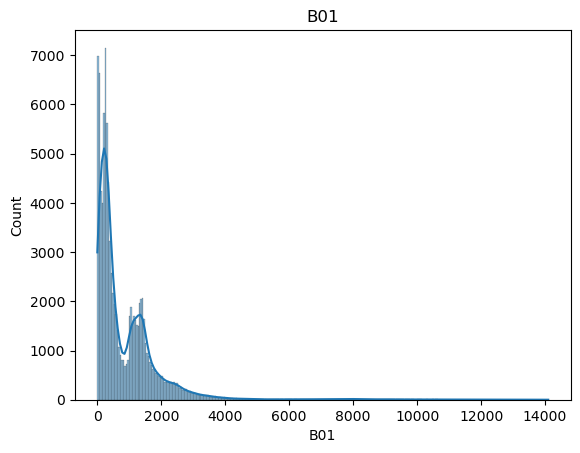

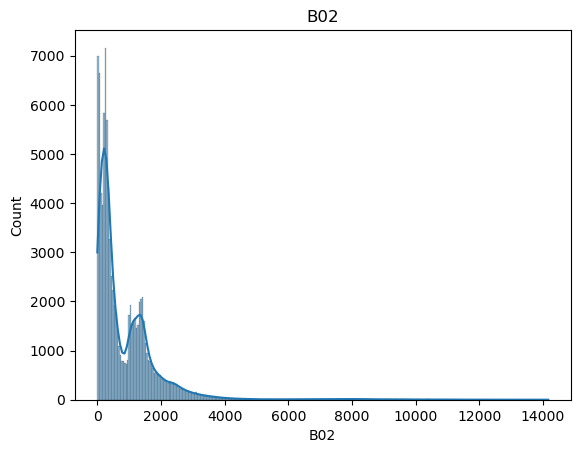

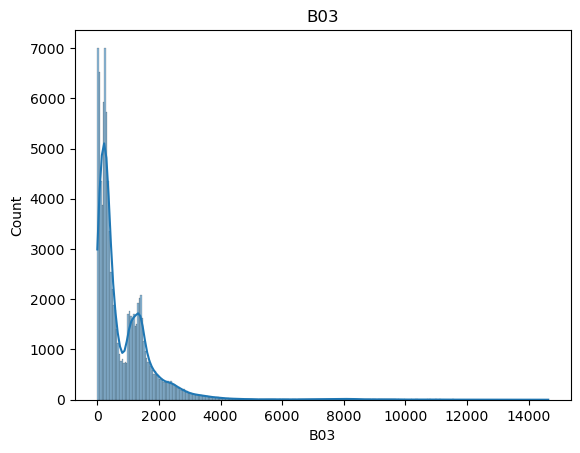

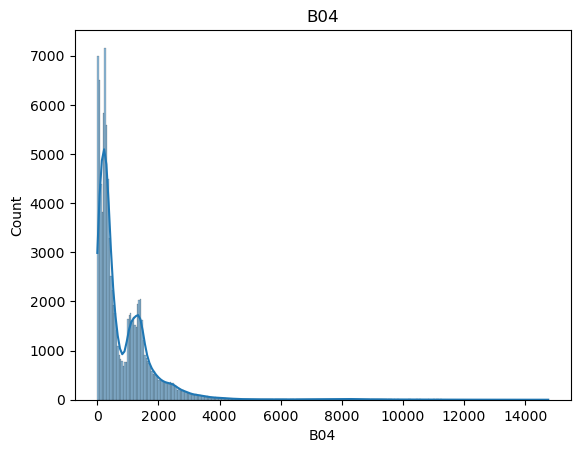

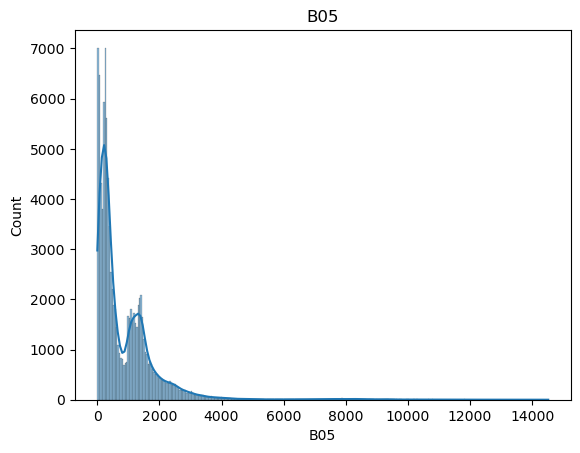

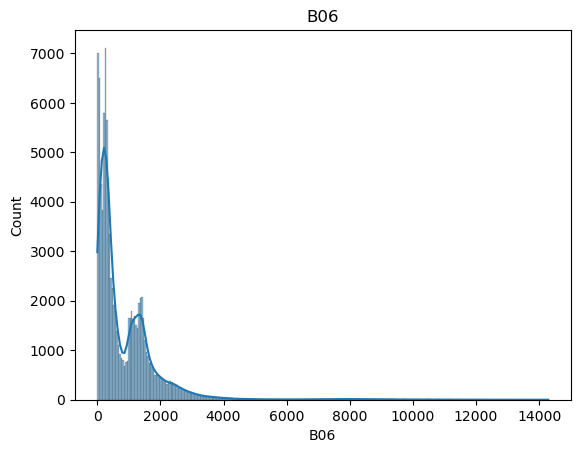

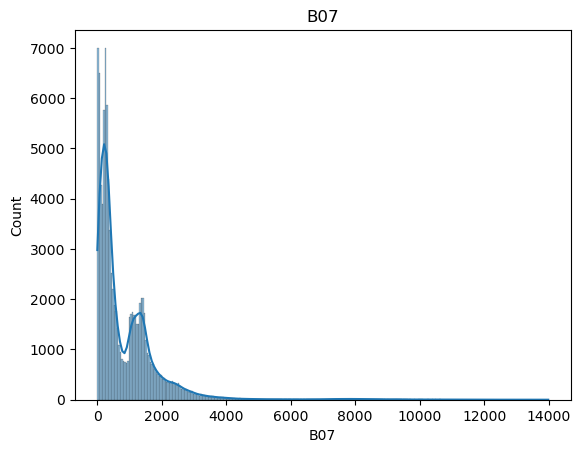

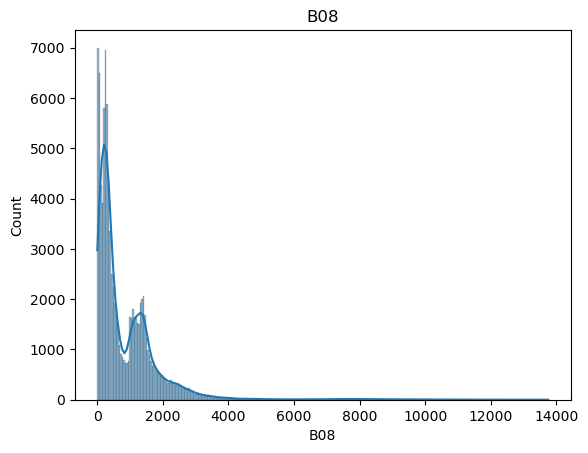

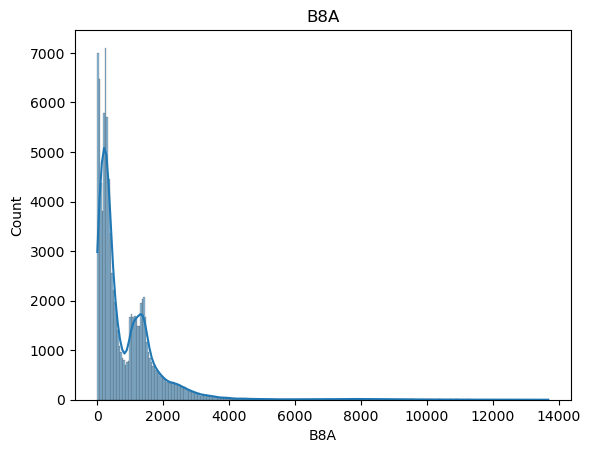

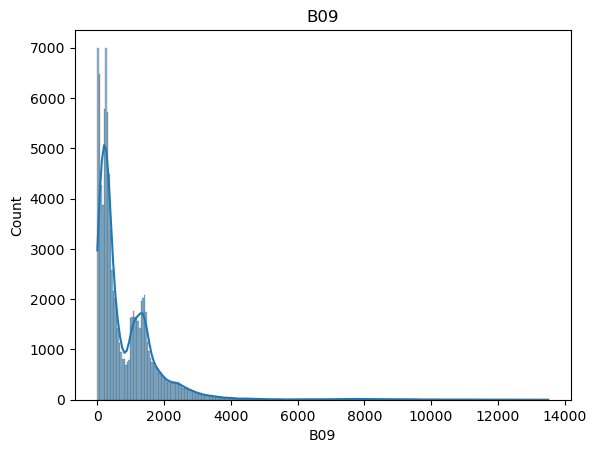

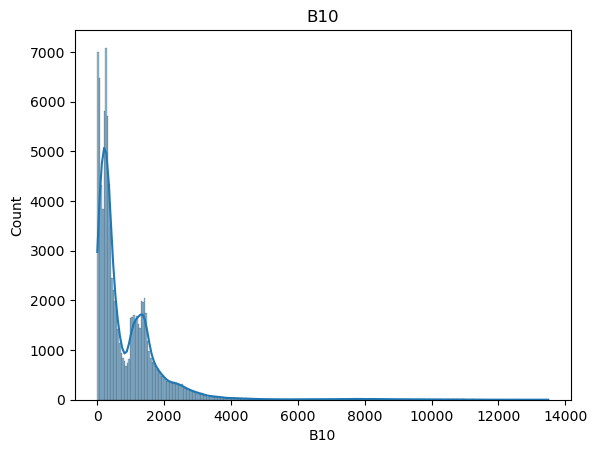

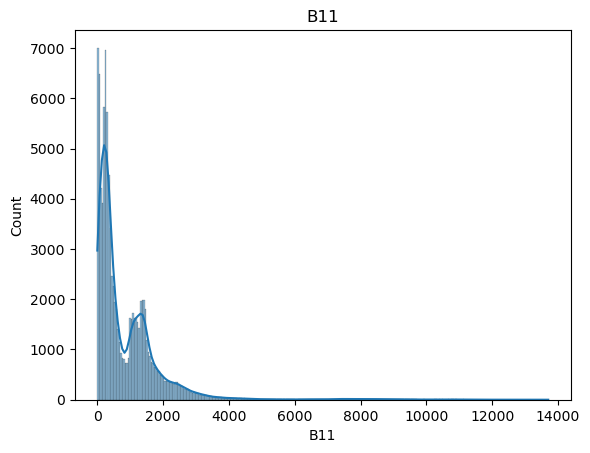

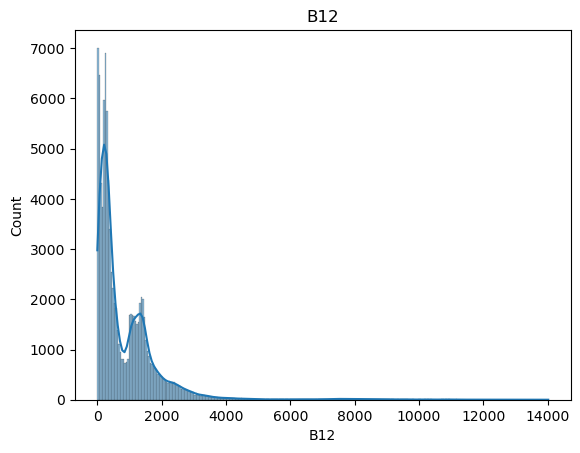

In [672]:
plot_histograms(sd)

In [673]:
pt = PowerTransformer(method = 'box-cox')

In [674]:
sd = pd.DataFrame(pt.fit_transform(sd), columns = sd.columns)

In [676]:
sd.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12
0,-0.763374,-0.759725,-0.752575,-0.731615,-0.708005,-0.691629,-0.681927,-0.681843,-0.691544,-0.698352,-0.698519,-0.698870,-0.702400
1,0.108723,0.116985,0.134481,0.129649,0.118046,0.119537,0.099288,0.104860,0.109035,0.095254,0.089461,0.075289,0.059687
2,-0.435391,-0.467010,-0.479441,-0.469281,-0.454451,-0.432720,-0.420908,-0.423158,-0.425427,-0.423265,-0.430615,-0.443005,-0.440805
3,-1.134238,-1.122259,-1.116371,-1.110653,-1.116868,-1.111264,-1.093947,-1.088270,-1.093955,-1.105711,-1.117517,-1.135760,-1.148167
4,0.897420,1.002990,1.104427,1.133128,1.092786,1.128346,1.234037,1.387408,1.573598,1.630456,1.572552,1.436940,1.197321


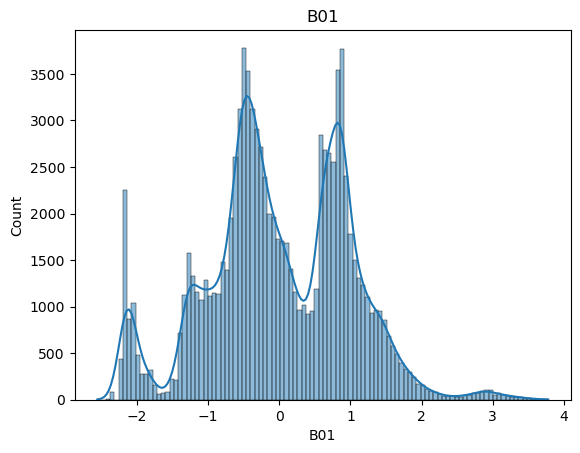

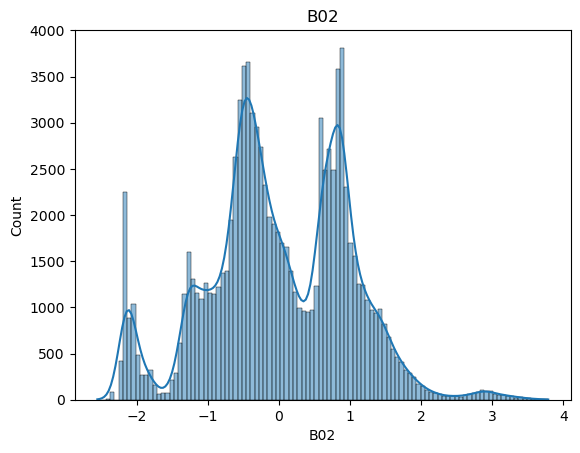

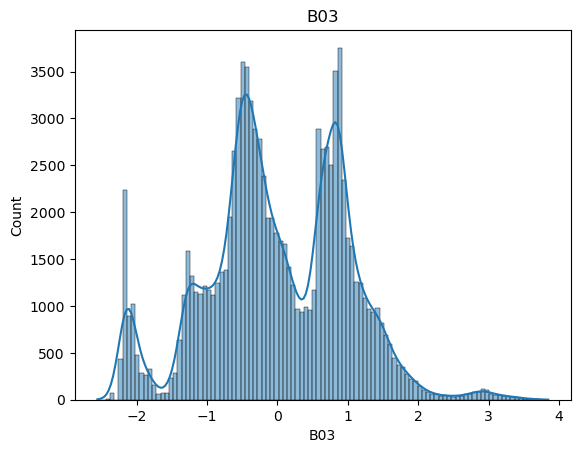

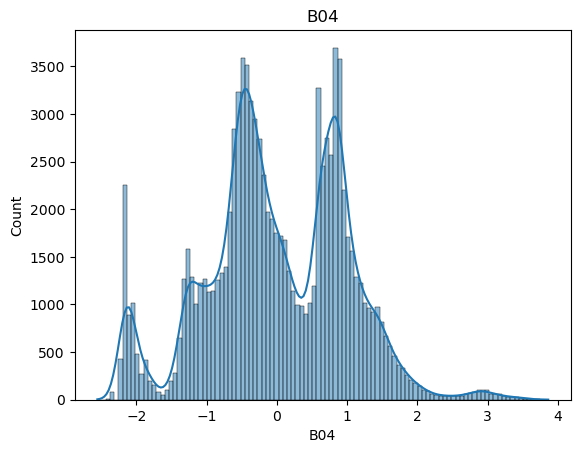

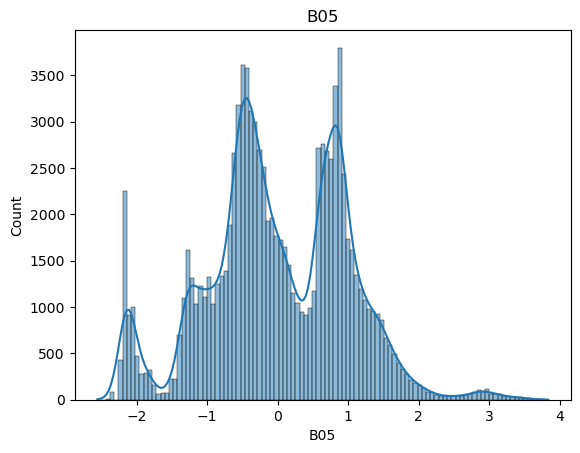

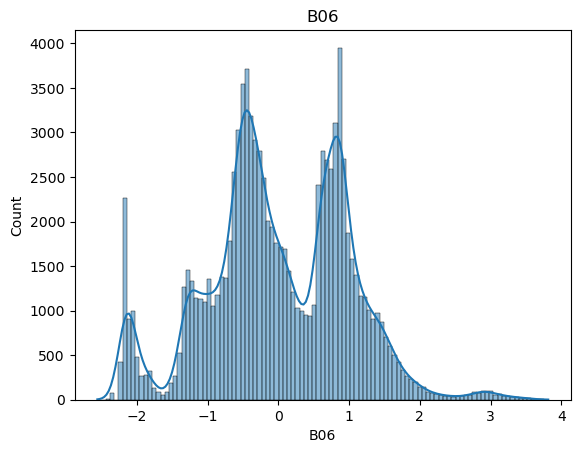

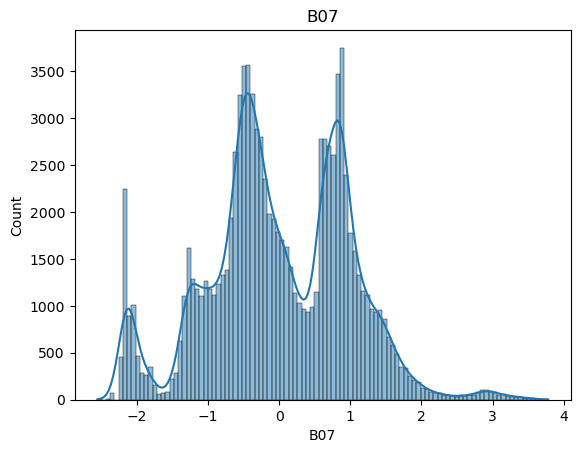

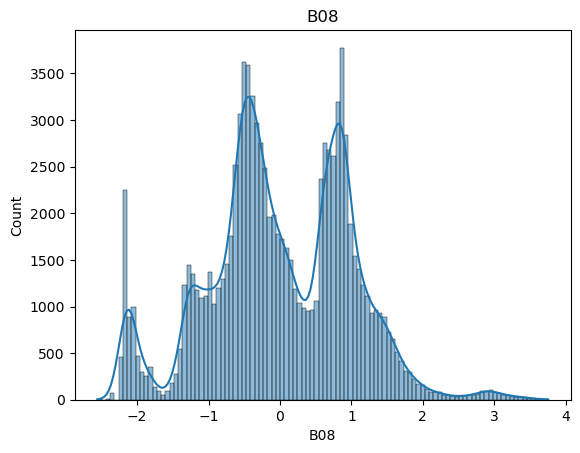

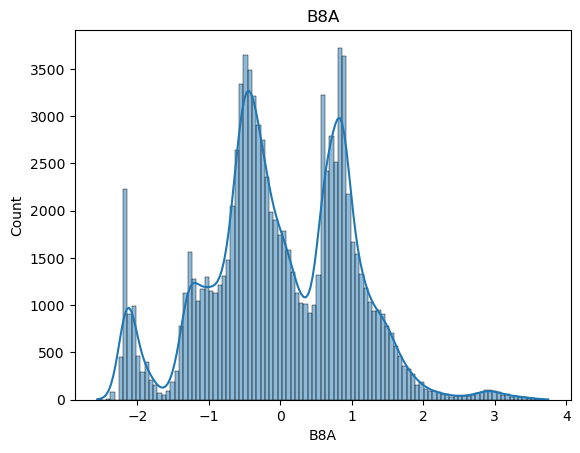

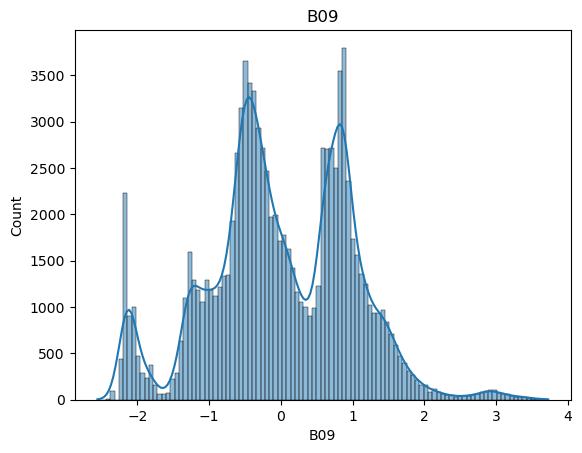

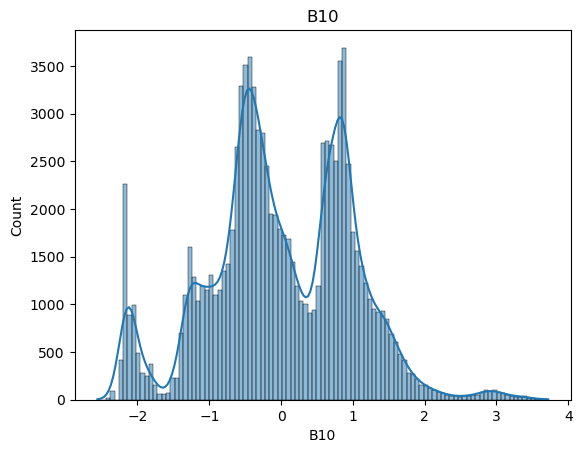

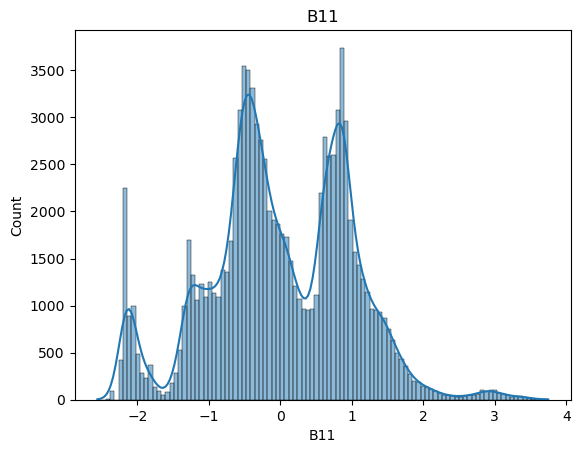

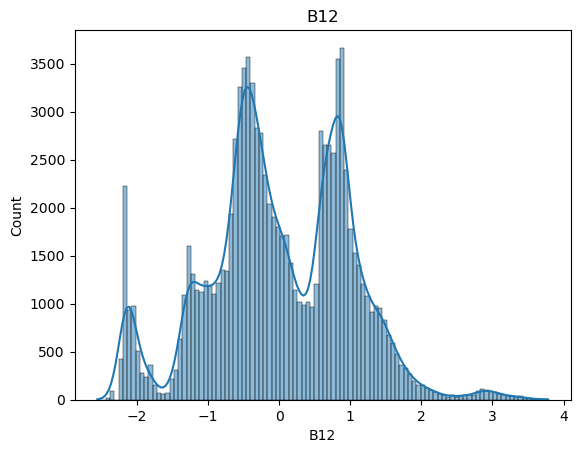

In [675]:
plot_histograms(sd)

In [678]:
X_train.shape

(10667197, 13)

In [656]:
X_train = X_train.loc[~(X_train==0).any(axis=1)]

In [499]:
scaler = RobustScaler()

In [500]:
pixel_df = scaler.fit_transform(X_train)
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
# pca = decomposition.PCA(n_components = 2, random_state = 42)
sample_data = pixel_df.sample(1_000_000, random_state = 42)
# pca_data = pca.fit_transform(sample_data)
# pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

In [501]:
pixel_df.shape

(10667197, 13)

In [679]:
tsne = manifold.TSNE(n_components = 2,learning_rate=650, perplexity = 50, random_state = 42, verbose = 2, n_iter = 2000, n_jobs=-1)
transformed_data = tsne.fit_transform(sd)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.146s...
[t-SNE] Computed neighbors for 100000 samples in 2.667s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

In [166]:
import matplotlib.pyplot as plt 

In [494]:
#copy_tf = transformed_data.copy()

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


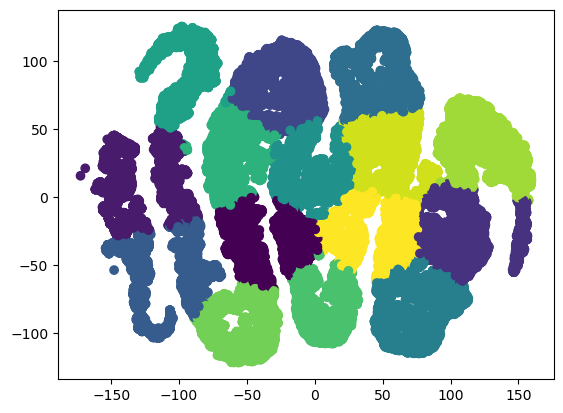

In [680]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(transformed_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

In [681]:
tf_df = pd.DataFrame(transformed_data)

In [682]:
subsample = tf_df.sample(100_000)

<Axes: xlabel='0', ylabel='1'>

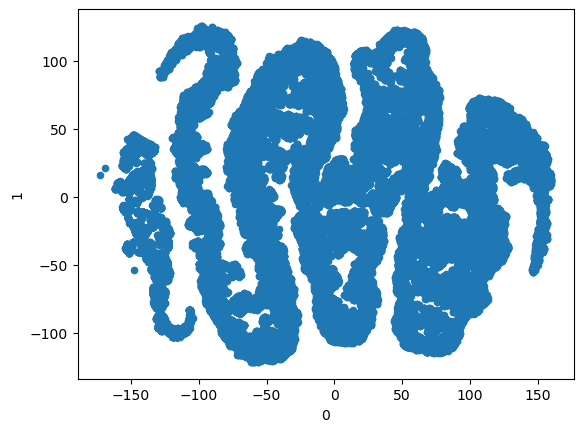

In [683]:
subsample.plot.scatter(x = 0, y = 1)

In [684]:
from sklearn.cluster import OPTICS

# Create an OPTICS object
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit the OPTICS model to the transformed data
optics.fit(subsample)



/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_cluster_size=0.1)

In [634]:
subsample

,0,1
866112,-44.200745,111.094994
104928,-27.478567,10.048394
794434,119.648796,1.153113
538944,9.804543,-107.947296
285025,-54.948128,72.093399
...,...,...
578716,-63.750744,-16.100054
29042,-94.080269,-20.751503
711750,116.594887,-35.714455
231678,45.515476,98.450096


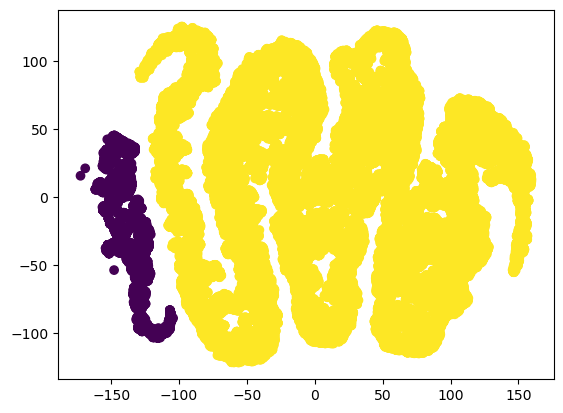

In [685]:
# Retrieve the cluster labels and core sample indices
labels = optics.labels_


# Plot the reduced data and color it by the cluster labels
plt.scatter(subsample[0], subsample[1], c=labels)
plt.show()

In [504]:
# import matplotlib.pyplot as plt 
# kmeans = KMeans(n_clusters=14, random_state=42)
# kmeans.fit(transformed_data)
# labels = kmeans.labels_

# # Create a 3D scatter plot of the t-SNE clusters
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=labels, cmap='viridis')
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# ax.add_artist(legend1)

# ax.set_xlabel("t-SNE Dimension 1")
# ax.set_ylabel("t-SNE Dimension 2")
# ax.set_zlabel("t-SNE Dimension 3")

# plt.title("t-SNE Clustering with K-means Labels")
# plt.show()

# # Create a pairplot to visualize pairwise relationships
# data_with_tsne = np.concatenate([sample_data, transformed_data], axis=1)
# data_with_tsne = np.column_stack([data_with_tsne, labels])

# labels_names = ['Feature ' + str(i+1) for i in range(13)] + ['t-SNE Dimension 1', 't-SNE Dimension 2', 't-SNE Dimension 3', 'Cluster']
# df = pd.DataFrame(data_with_tsne, columns=labels_names)

# sns.pairplot(df, vars=labels_names[:-1], hue='Cluster', plot_kws={'alpha': 0.5})
# plt.suptitle('Pairwise Relationships with t-SNE Clusters (K-means Labels)')
# plt.show()

In [722]:
path = pkg_resources.resource_filename('ShallowLearn', '../Data/Clear_Reefs.csv')
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())
X_train = X_train.loc[~(X_train==0).any(axis=1)]

(20906100, 13)


In [723]:
X_train.drop(columns = 'B10', inplace = True)

In [724]:
pt.fit(X_train)

PowerTransformer(method='box-cox')

In [686]:
from xgboost import XGBClassifier

In [687]:
from sklearn.model_selection import train_test_split

In [688]:
sample_data

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12
971639,-0.270968,-0.270295,-0.268698,-0.263401,-0.256244,-0.251619,-0.248844,-0.248844,-0.252544,-0.254394,-0.254394,-0.256244
4598299,0.118894,0.124539,0.136657,0.133087,0.125809,0.126735,0.112858,0.116559,0.118409,0.109158,0.096207,0.085106
8862837,-0.166820,-0.178967,-0.183749,-0.180222,-0.173913,-0.165587,-0.160962,-0.161887,-0.163737,-0.162812,-0.170213,-0.170213
3731501,-0.345622,-0.344096,-0.343490,-0.342884,-0.343201,-0.342276,-0.339500,-0.338575,-0.340426,-0.342276,-0.346901,-0.349676
4836919,0.910599,1.062731,1.220683,1.267098,1.201665,1.258094,1.438483,1.727105,2.122109,2.254394,1.828862,1.373728
...,...,...,...,...,...,...,...,...,...,...,...,...
9650780,-0.312442,-0.316421,-0.317636,-0.317930,-0.315449,-0.314524,-0.315449,-0.316374,-0.318224,-0.318224,-0.315449,-0.314524
4970870,1.145622,1.202952,1.264081,1.293900,1.280296,1.241443,1.292322,1.705828,1.455134,1.320999,1.253469,1.234968
6824551,1.837788,1.835793,1.714681,1.672828,1.620722,1.436633,1.103608,0.883441,0.637373,0.267345,-0.024052,-0.033302
2317190,-0.417512,-0.417897,-0.418283,-0.418669,-0.419056,-0.419056,-0.419056,-0.419056,-0.419981,-0.419056,-0.419056,-0.419981


In [508]:
X_train.drop(columns = ["B10"], axis = 1, inplace = True)

In [509]:
scaler.fit(X_train)

RobustScaler()

(100000, 1)

In [768]:
sd.drop(columns = ['B10'], axis = 1, inplace = True)

In [769]:
X_train, X_test, y_train, y_test = train_test_split(sd, abs(np.expand_dims(labels, axis = 1)), test_size=.2)

In [770]:
#scaler = StandardScaler().fit(X_train)

In [771]:
bst = XGBClassifier(n_estimators=20, max_depth=8, learning_rate=1, objective='multi:softmax', num_class=len(np.unique(labels)))

In [772]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=0, num_class=2,
              num_parallel_tree=1, objective='multi:softmax', ...)

In [773]:
preds = bst.predict(X_test)

In [774]:
from sklearn.metrics import roc_auc_score

In [775]:
bst.predict_proba(X_test).shape

(20000, 2)

In [776]:
roc_auc_score(y_test, bst.predict(X_test), multi_class='ovo')

0.49896161037386105

In [777]:
from sklearn.metrics import confusion_matrix

In [778]:
cm = confusion_matrix(y_test, preds)

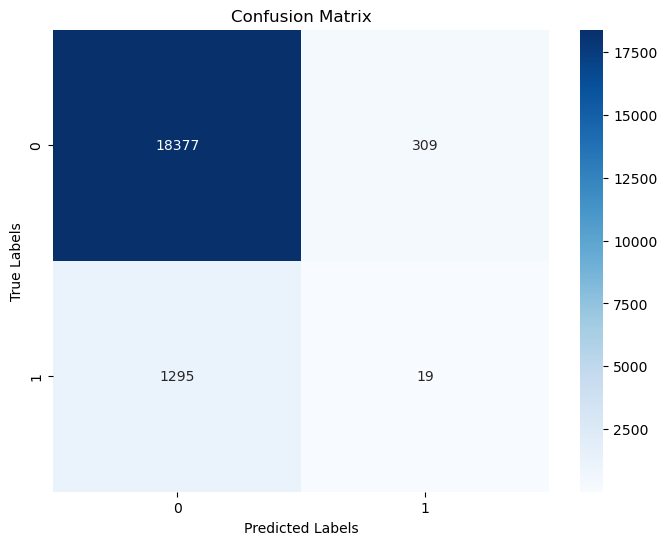

In [779]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [808]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [809]:
from ShallowLearn import ImageHelper

In [810]:
img_test = ImageHelper.load_img(dir_list[4])

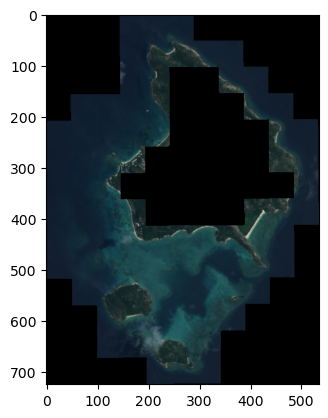

In [811]:
ImageHelper.plot_rgb(img_test, plot = True)

In [812]:
img_test = ImageHelper.remove_channel(img_test, 10)

In [813]:
original_shape = img_test.shape

In [814]:
original_shape

(725, 534, 12)

In [815]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [816]:
test_arr = np.where(test_arr == 0, np.nan, test_arr)

In [817]:
test_pred = bst.predict(pt.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [790]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

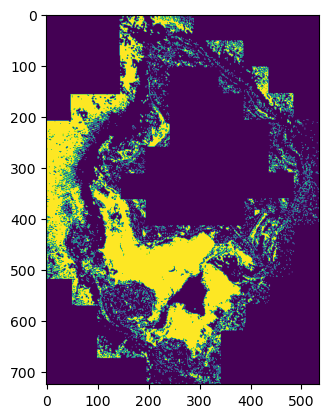

In [791]:
plt.imshow(test_pred)

In [792]:

# specify the directory path
dir_path = '/media/ziad/Expansion/Honduras_Clipped'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [793]:
img_num = 10
img_test = ImageHelper.load_img(dir_list[img_num])

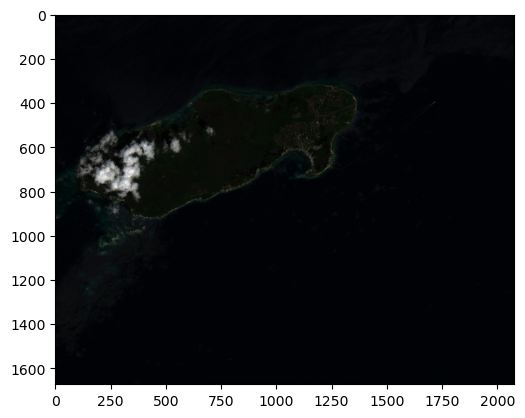

In [794]:
ImageHelper.plot_rgb(img_test, plot = True)

In [795]:
#img_test = ImageHelper.remove_channel(img_test, 10)
original_shape = img_test.shape

In [796]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [797]:
test_pred = bst.predict(scaler.transform(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [798]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

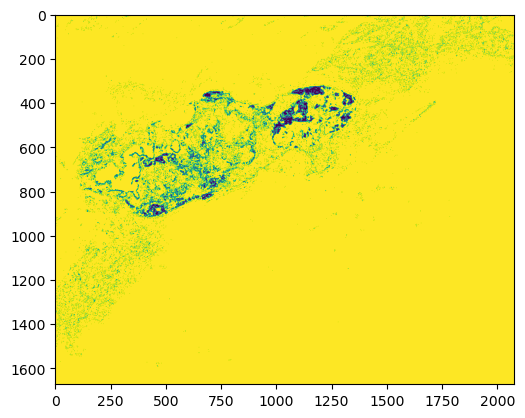

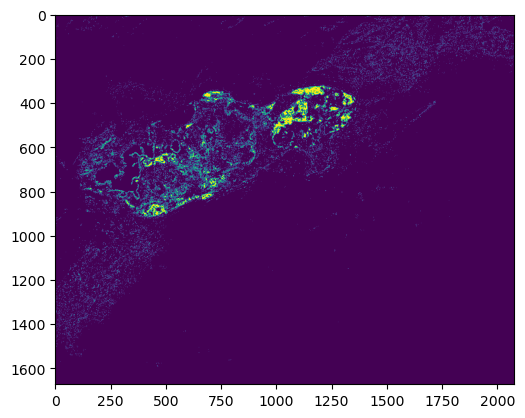

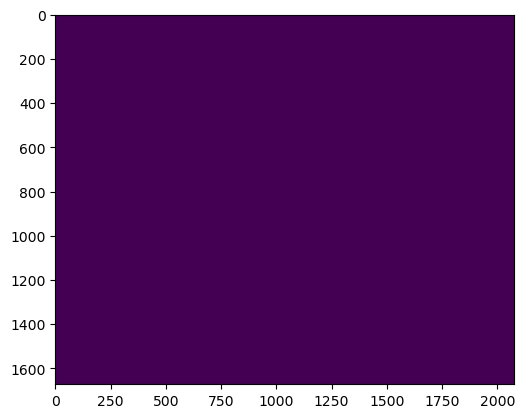

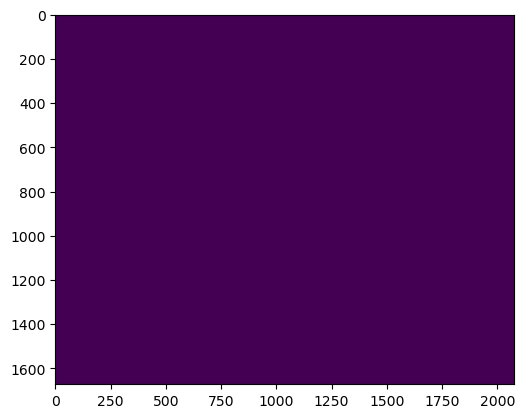

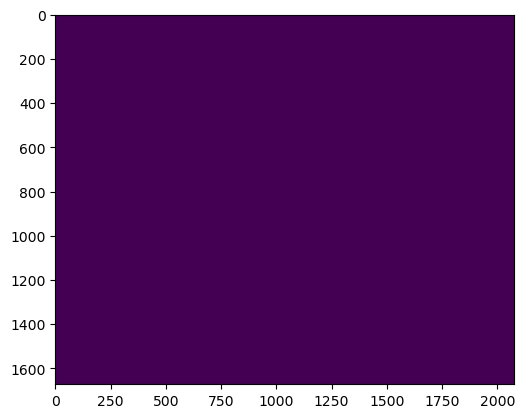

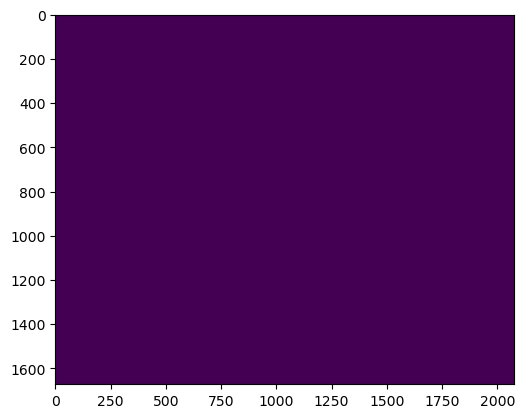

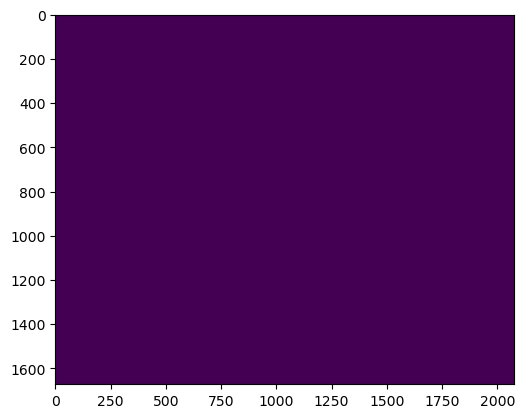

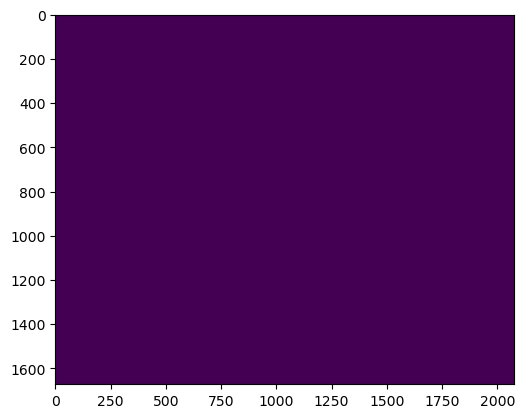

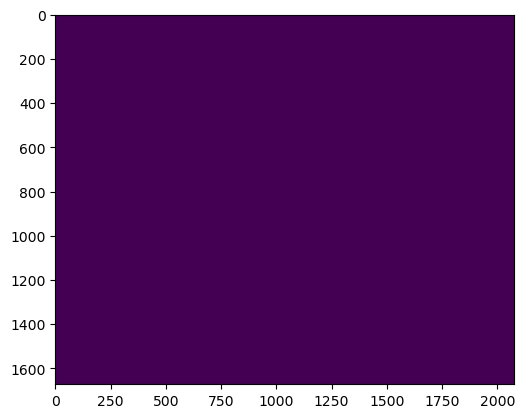

In [799]:
for i in range(9):

    plt.imshow(test_pred==i)
    plt.show()